<a href="https://colab.research.google.com/github/Kaggle-challange-group8/Titanic_space_ship_group_8/blob/main/Kaggle_challange_group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

i

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from tensorflow.keras.layers import GlobalMaxPooling1D


In [2]:

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

Dataset Description

In [3]:
train_df = pd.read_csv("https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/train-3.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/test-3.csv")


In [35]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [36]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(4)
memory usage: 687.8 KB


In [ ]:
test_df.info()

In [4]:
test_passenger_ids = test_df['PassengerId']


In [12]:

# Check missing data
print("\nMissing values in train data:")
print(train_df.isnull().sum())


Missing values in train data:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


<Axes: >

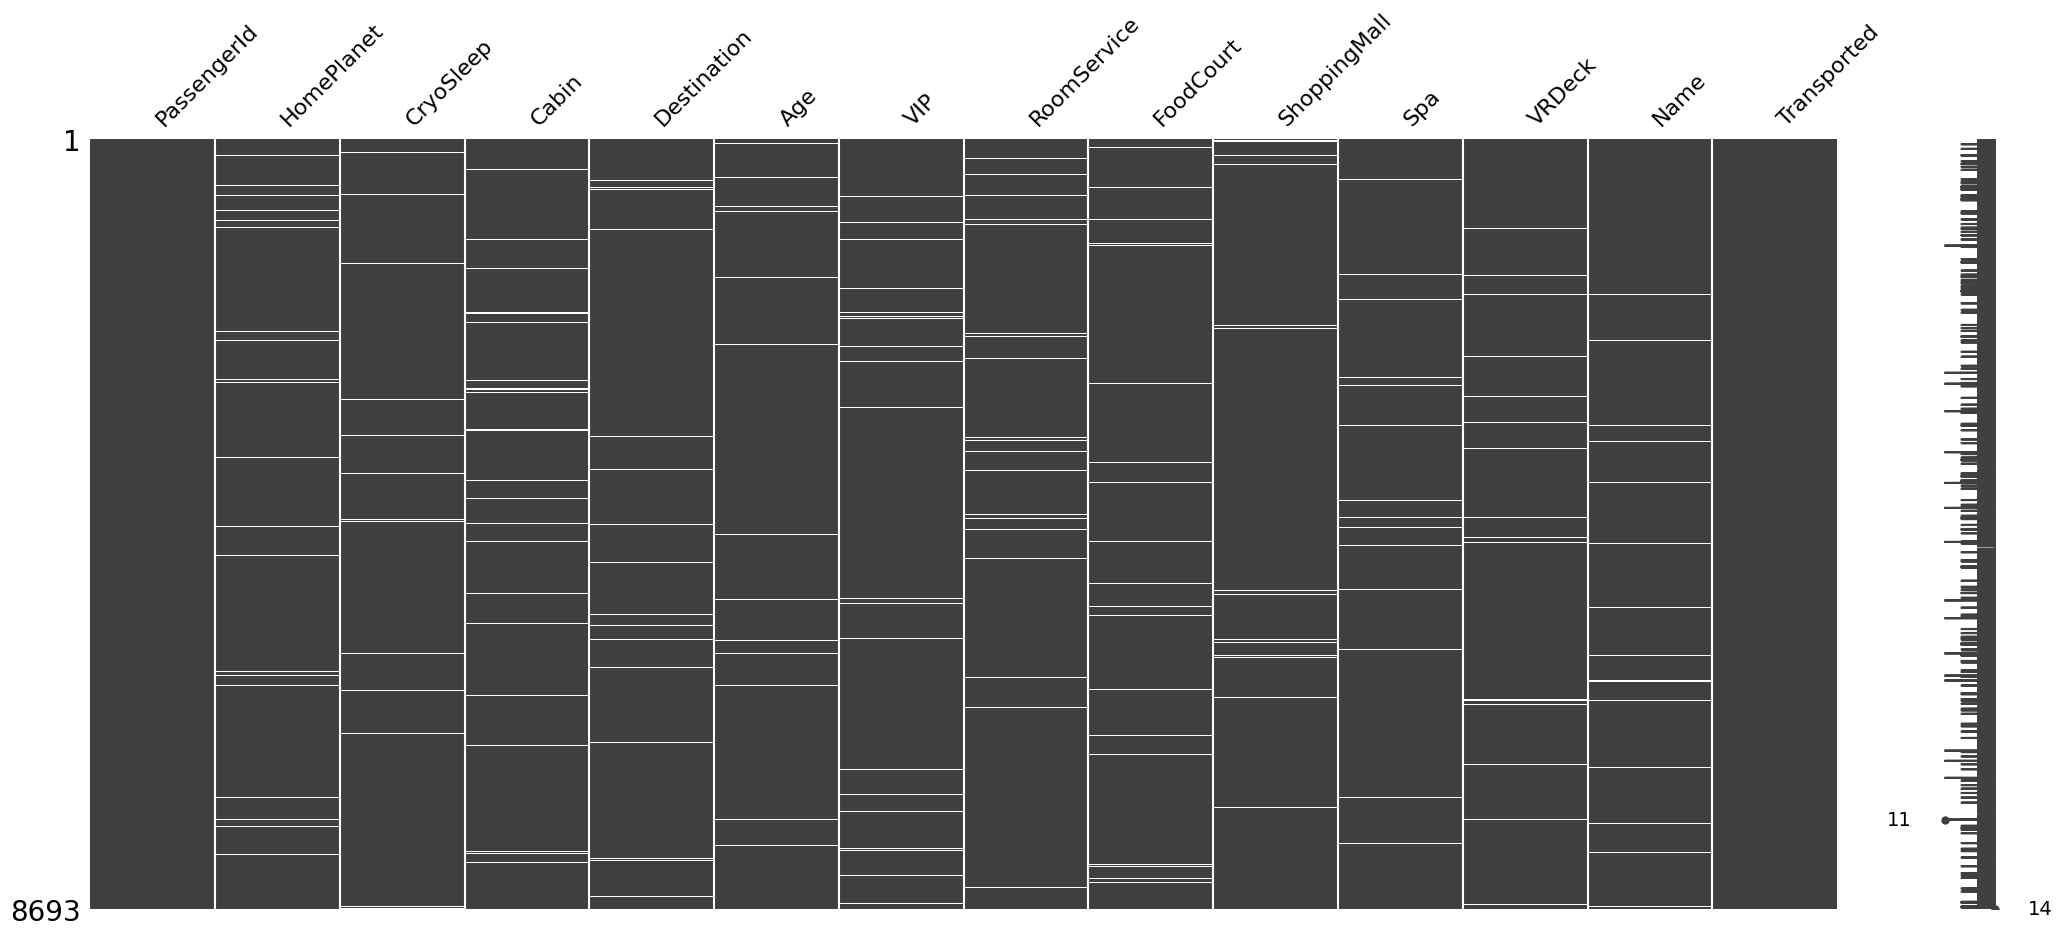

In [5]:
import missingno as msno
msno.matrix(train_df)

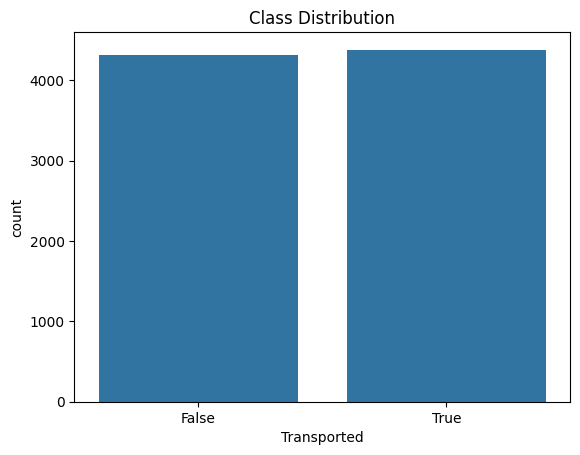

In [11]:
# Class Distribution
sns.countplot(x='Transported', data=train_df)
plt.title("Class Distribution")
plt.show()

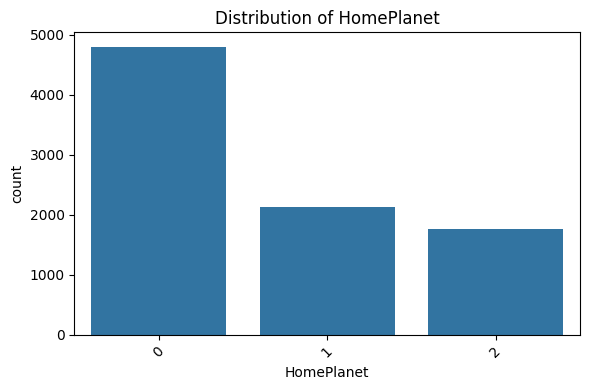

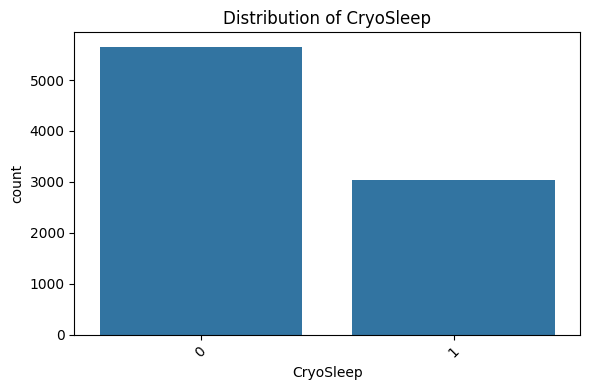

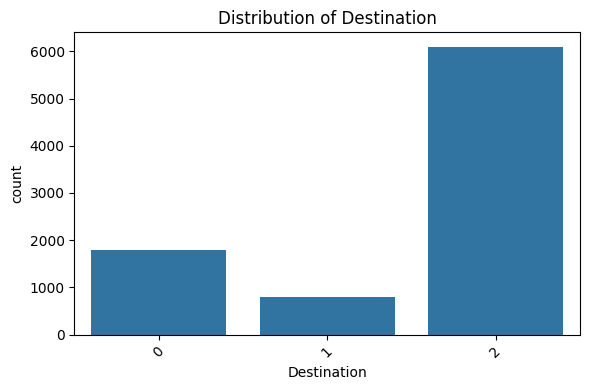

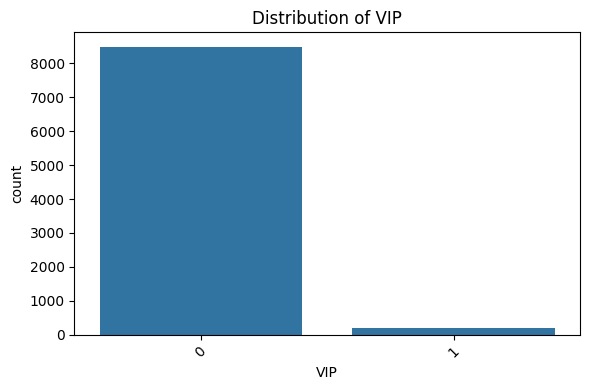

In [32]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=train_df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

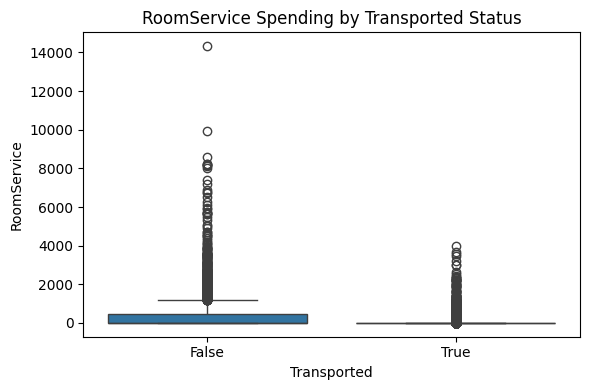

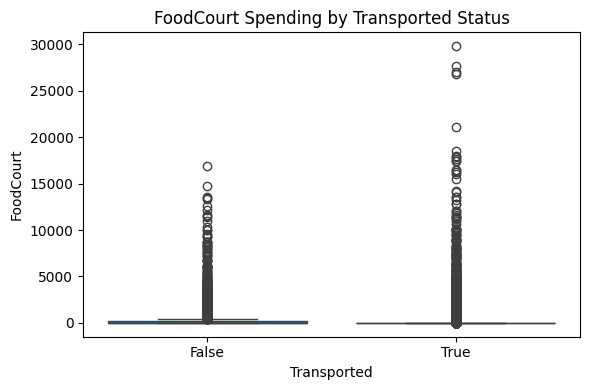

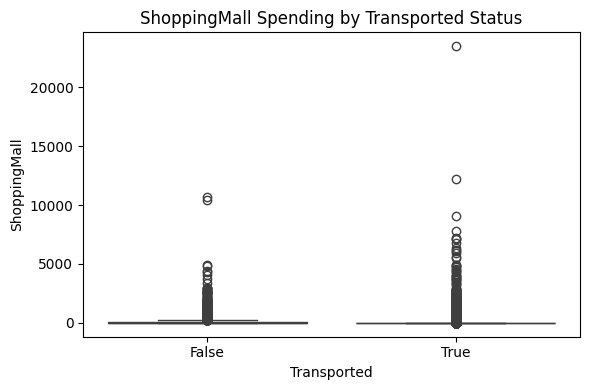

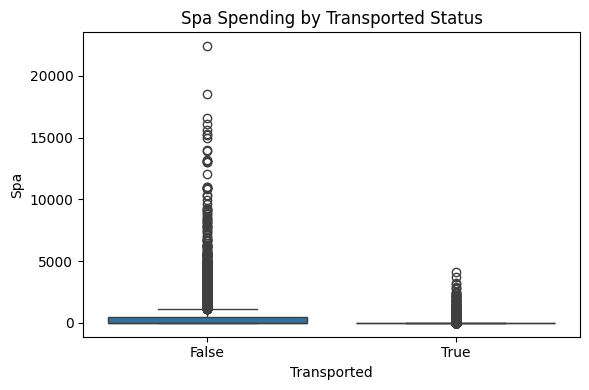

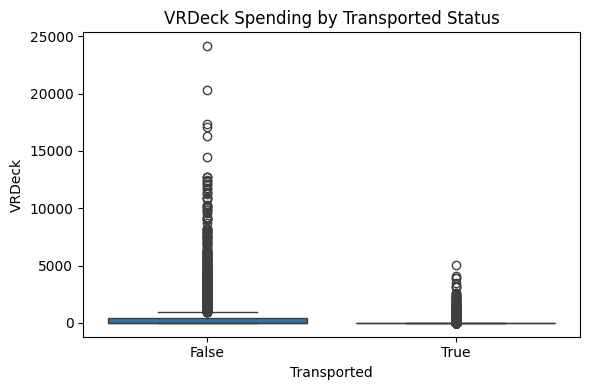

In [6]:
spend_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for feature in spend_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Transported', y=feature, data=train_df)
    plt.title(f'{feature} Spending by Transported Status')
    plt.tight_layout()

Text(0.5, 0, 'Age')

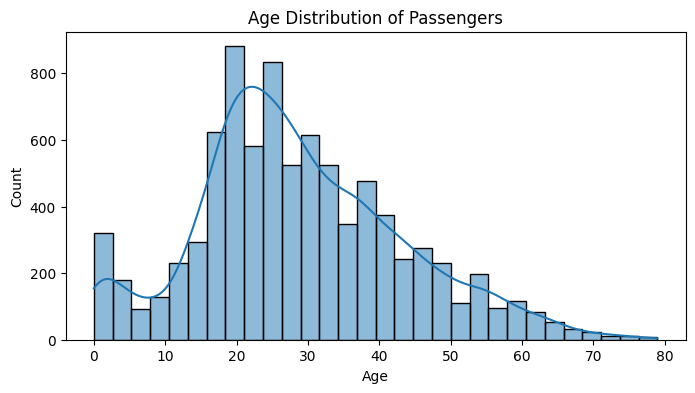

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')

Text(0.5, 1.0, 'Age vs Transported')

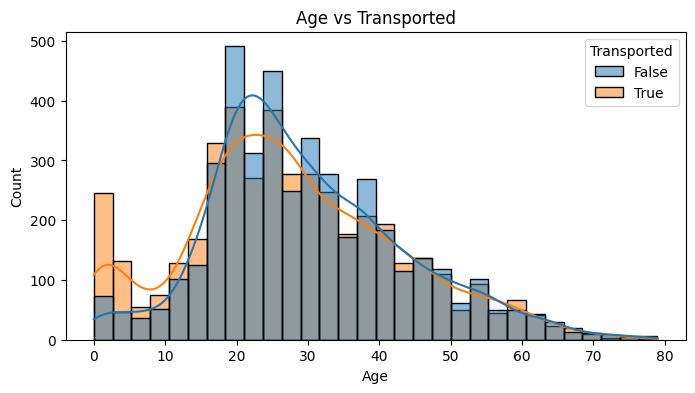

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(data=train_df, x='Age', hue='Transported', bins=30, kde=True)
plt.title('Age vs Transported')

Text(0.5, 1.0, 'CryoSleep Status vs Transported')

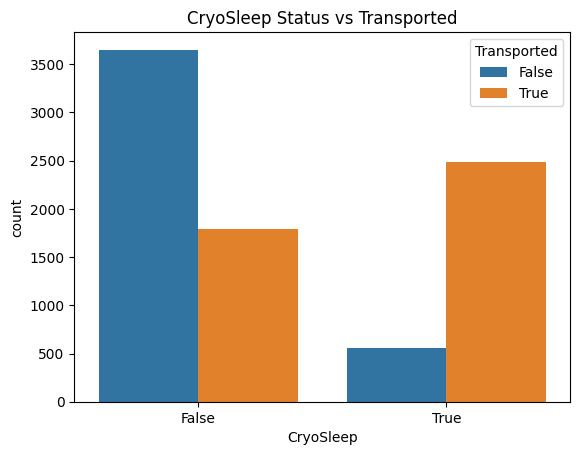

In [9]:
sns.countplot(data=train_df, x='CryoSleep', hue='Transported')
plt.title('CryoSleep Status vs Transported')


Text(0.5, 1.0, 'VIP Status vs Transported')

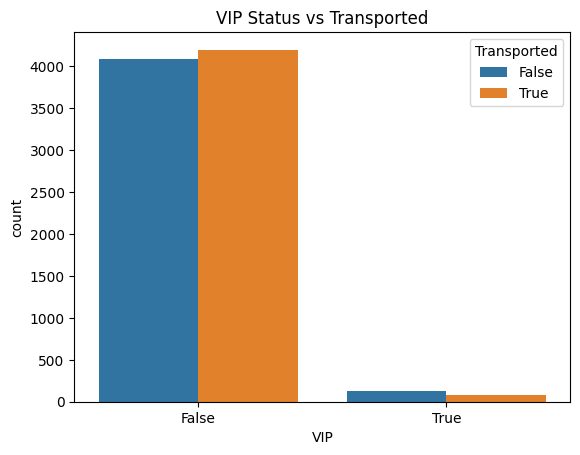

In [10]:
sns.countplot(data=train_df, x='VIP', hue='Transported')
plt.title('VIP Status vs Transported')

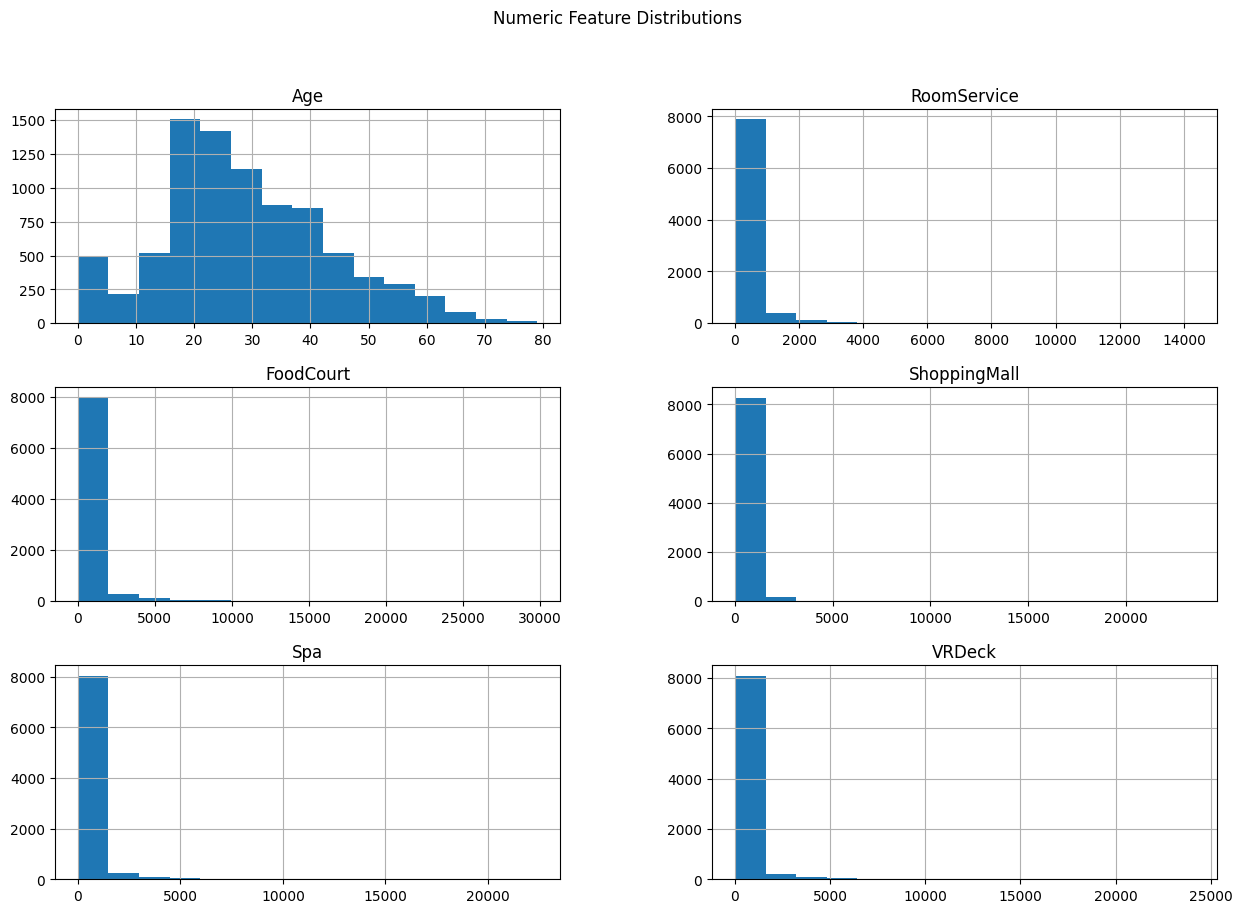

In [13]:
# Plot numeric features histograms
num_cols = train_df.select_dtypes(include='number').columns.tolist()
train_df[num_cols].hist(bins=15, figsize=(15,10))
plt.suptitle('Numeric Feature Distributions')
plt.show()

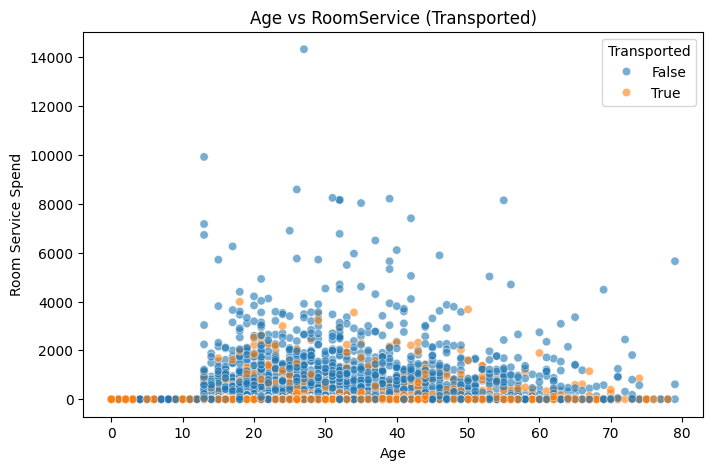

In [15]:
# Age vs RoomService (colored by Transported)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='Age', y='RoomService', hue=train_df['Transported'], alpha=0.6)
plt.title('Age vs RoomService (Transported)')
plt.xlabel('Age')
plt.ylabel('Room Service Spend')
plt.legend(title='Transported')
plt.show()

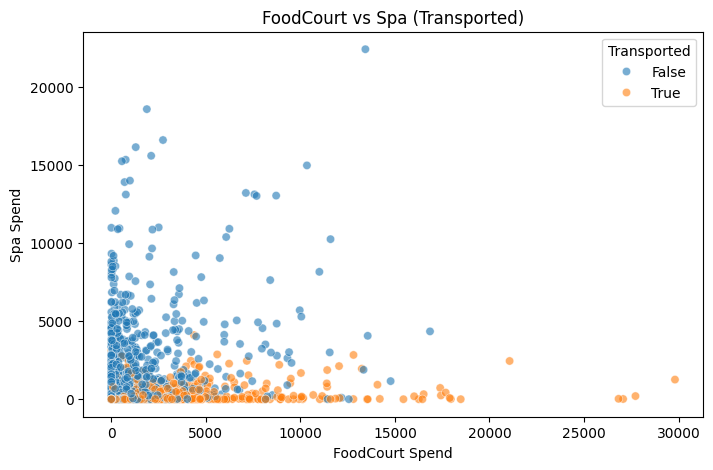

In [16]:
# FoodCourt vs Spa (colored by Transported)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='FoodCourt', y='Spa', hue=train_df['Transported'], alpha=0.6)
plt.title('FoodCourt vs Spa (Transported)')
plt.xlabel('FoodCourt Spend')
plt.ylabel('Spa Spend')
plt.legend(title='Transported')
plt.show()

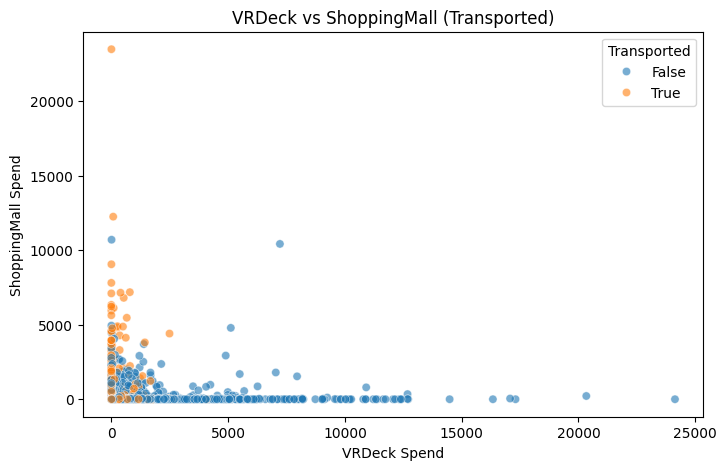

In [17]:
# VRDeck vs ShoppingMall
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='VRDeck', y='ShoppingMall', hue=train_df['Transported'], alpha=0.6)
plt.title('VRDeck vs ShoppingMall (Transported)')
plt.xlabel('VRDeck Spend')
plt.ylabel('ShoppingMall Spend')
plt.legend(title='Transported')
plt.show()

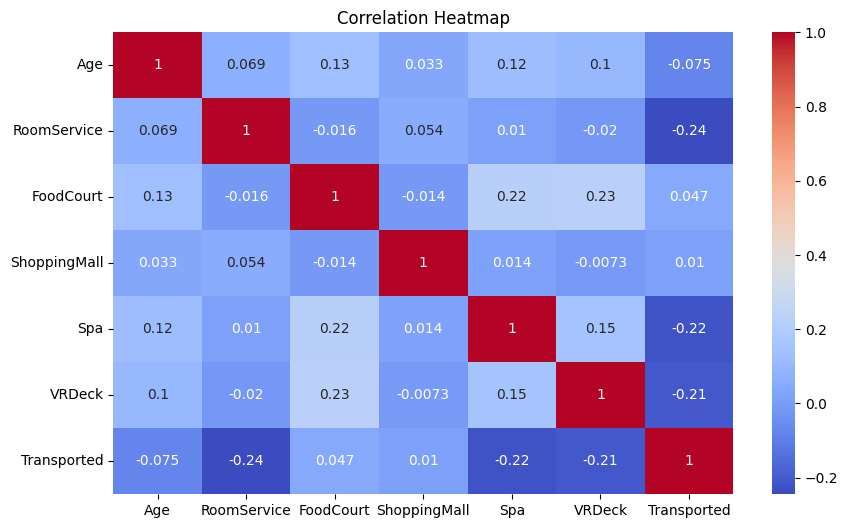

In [14]:
# Correlation Heatmap
df_corr = train_df.copy()
df_corr['Transported'] = df_corr['Transported'].astype(int)
df_corr = df_corr.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

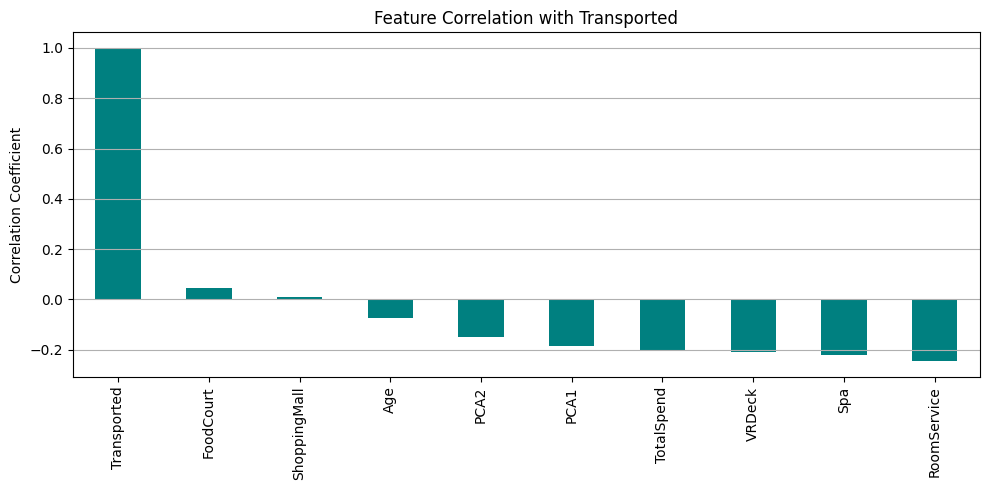

In [ ]:
# Encode Transported as int
train_df['Transported_numeric'] = train_df['Transported'].astype(int)

# Calculate correlations
correlations = train_df.corr(numeric_only=True)['Transported_numeric'].sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 5))
correlations.drop('Transported_numeric').plot(kind='bar', color='teal')
plt.title("Feature Correlation with Transported")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

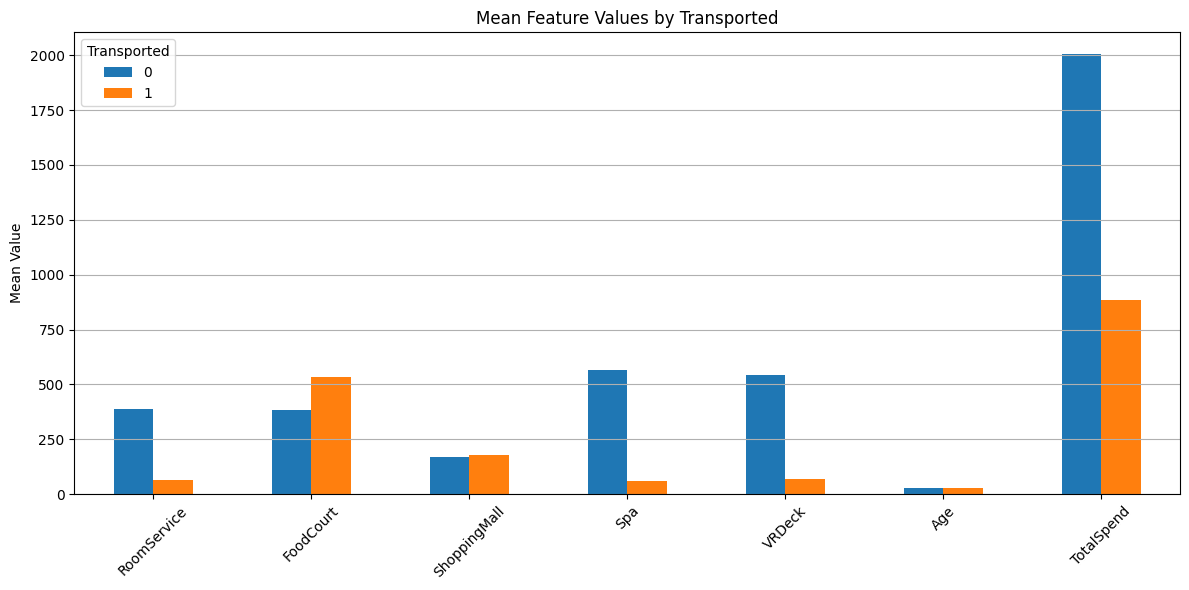

In [ ]:
#Group means
means_by_target = train_df.groupby('Transported')[spend_features + ['Age', 'TotalSpend']].mean().T

# Bar plot of means
means_by_target.plot(kind='bar', figsize=(12, 6), title="Mean Feature Values by Transported")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

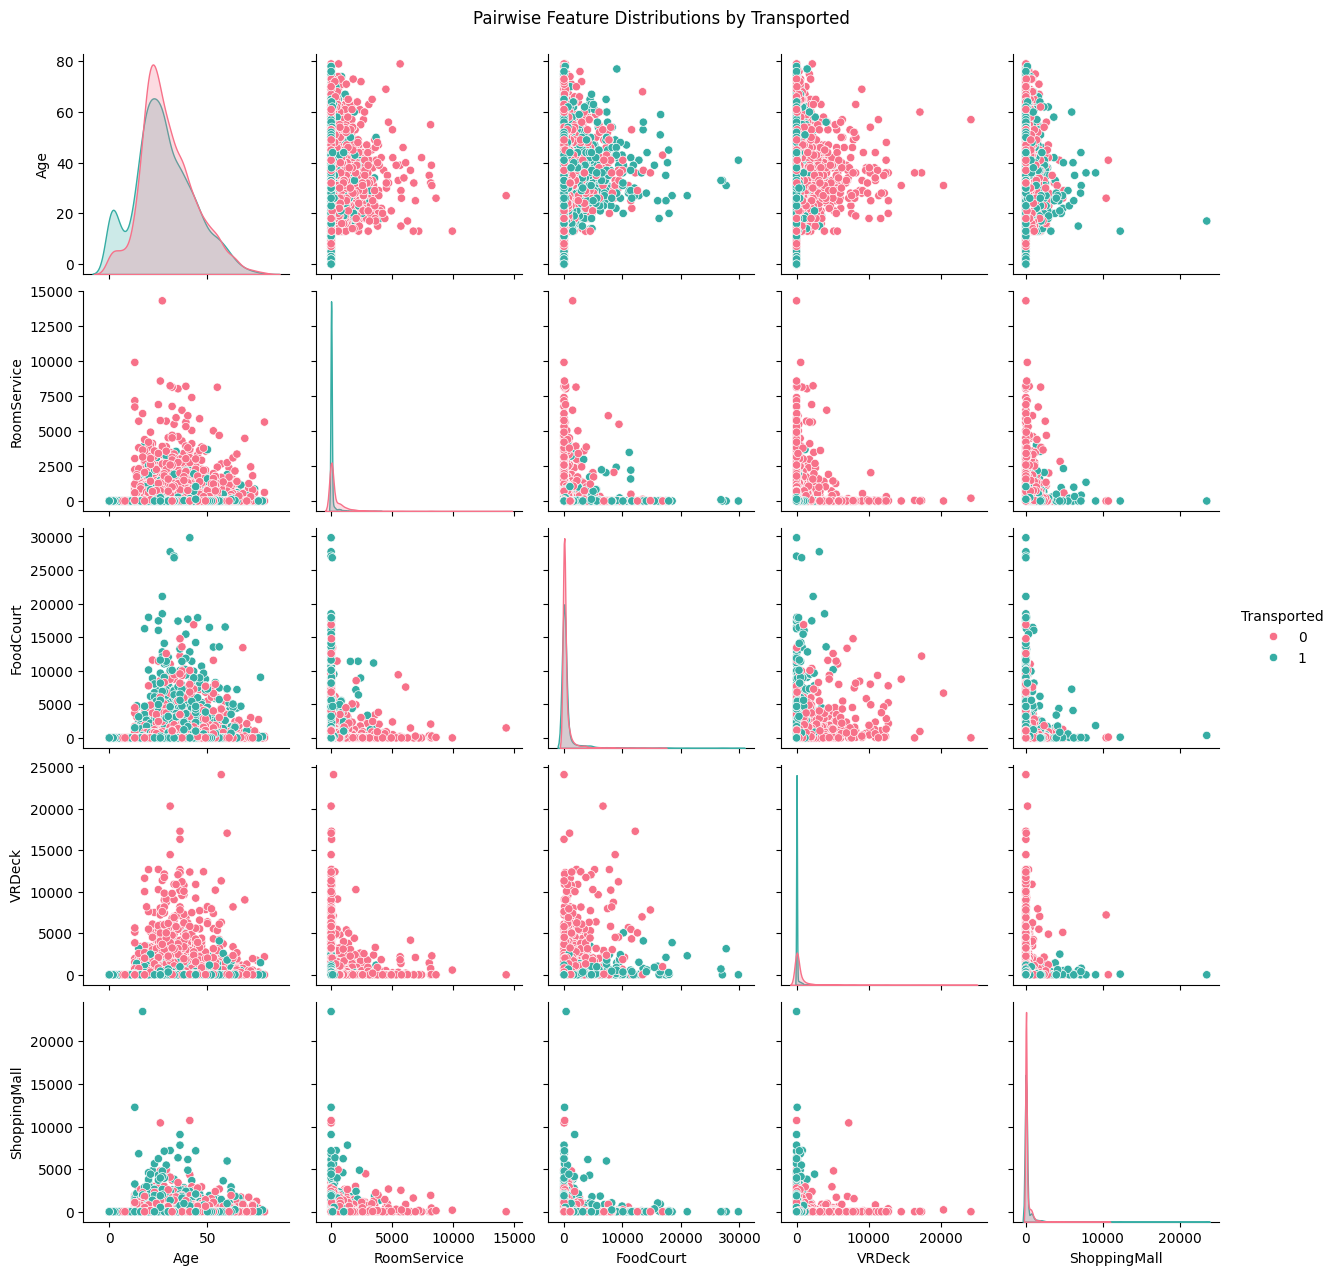

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select subset of numeric features
pairplot_features = ['Age', 'RoomService', 'FoodCourt', 'VRDeck', 'ShoppingMall', 'Transported']
sns.pairplot(train_df[pairplot_features], hue='Transported', palette='husl')
plt.suptitle("Pairwise Feature Distributions by Transported", y=1.02)
plt.show()

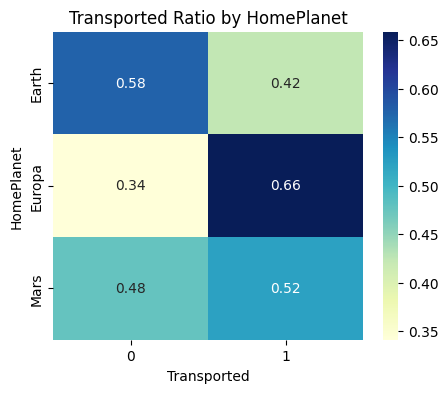

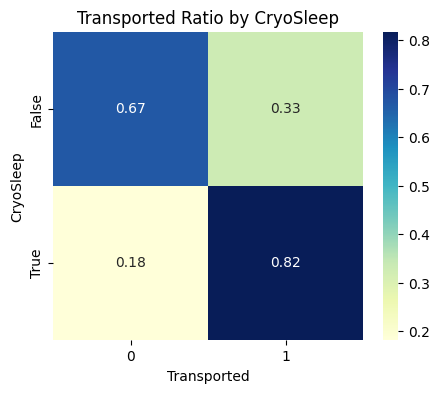

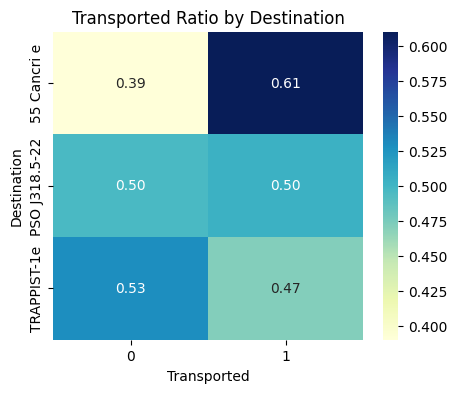

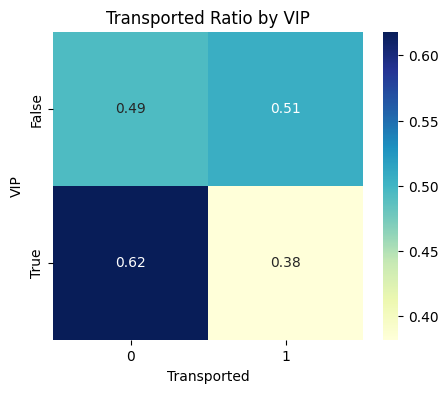

In [ ]:
# Crosstab Heatmaps
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in categorical_features:
    plt.figure(figsize=(5, 4))
    cross_tab = pd.crosstab(train_df[col], train_df['Transported'], normalize='index')
    sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'Transported Ratio by {col}')
    plt.ylabel(col)
    plt.xlabel('Transported')
    plt.show()


In [19]:
# --- Drop unnecessary columns ---
drop_cols = ['PassengerId', 'Name', 'Cabin']
train_df.drop(columns=drop_cols, inplace=True, errors='ignore')
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')

# --- Separate numeric and categorical ---
num_cols = train_df.select_dtypes(include='number').columns.tolist()
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
if 'Transported' in cat_cols:
    cat_cols.remove('Transported')

# --- Fill missing values ---
for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(train_df[col].median())

le_dict = {}
for col in cat_cols:
    mode_val = train_df[col].mode()[0]
    train_df[col] = train_df[col].fillna(mode_val)
    test_df[col] = test_df[col].fillna(mode_val)

    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    le_dict[col] = le

# --- Features and target ---
X = train_df.drop('Transported', axis=1)
y = train_df['Transported'].astype(int)
X_test = test_df.copy()

# --- Train/val split ---
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  stratify=y,
                                                  random_state=42)

# --- Scale for CNN ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# --- Reshape for CNN ---
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(-1, X_val_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

/tmp/ipython-input-2160788009.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[col] = train_df[col].fillna(mode_val)
/tmp/ipython-input-2160788009.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[col] = test_df[col].fillna(mode_val)
/tmp/ipython-input-2160788009.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

In [20]:
metrics_dict = {}

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

def print_classification_report(y_true, y_pred, model_name):
    print(f"\n=== {model_name} Classification Report ===")
    print(classification_report(y_true, y_pred))

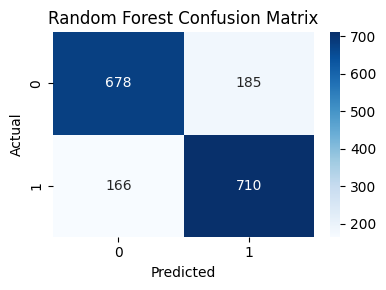


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       863
           1       0.79      0.81      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [21]:

def print_classification_report(y_true, y_pred, model_name):
    print(f"\n=== {model_name} Classification Report ===")
    print(classification_report(y_true, y_pred))

# --- Random Forest ---
'''rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
test_pred_rf = rf.predict(X_test)'''
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)
best_rf.fit(X_train, y_train)
rf_preds = best_rf.predict(X_val)
test_pred_rf = best_rf.predict(X_test)


metrics_dict['Random Forest'] = {
    'Accuracy': accuracy_score(y_val, rf_preds),
    'Precision': precision_score(y_val, rf_preds),
    'Recall': recall_score(y_val, rf_preds),
    'F1': f1_score(y_val, rf_preds)
}
plot_confusion_matrix(y_val, rf_preds, "Random Forest")
print_classification_report(y_val, rf_preds, "Random Forest")

In [22]:
pd.DataFrame({'PassengerId': test_passenger_ids, 'Transported': test_pred_rf.astype(bool)}).to_csv("submission_rf.csv", index=False)


📊 SHAP Summary Plot for Tuned Random Forest


/tmp/ipython-input-4160426375.py:21: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(summary_rf, X_rf_plot, feature_names=X_rf_plot.columns)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


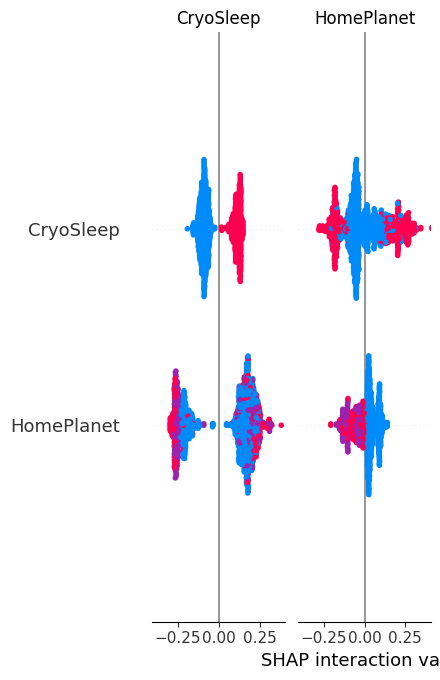

In [23]:
import shap

# Use TreeExplainer for Random Forest
explainer_rf = shap.TreeExplainer(best_rf)
shap_values_rf = explainer_rf.shap_values(X_val)

# If it's a list (binary classification), select the SHAP values for class 1
if isinstance(shap_values_rf, list):
    summary_rf = shap_values_rf[1]
else:
    summary_rf = shap_values_rf

# Ensure shape alignment
if summary_rf.shape[1] != X_val.shape[1]:
    X_rf_plot = X_val.iloc[:, :summary_rf.shape[1]]
else:
    X_rf_plot = X_val

# Plot SHAP summary
print("📊 SHAP Summary Plot for Tuned Random Forest")
shap.summary_plot(summary_rf, X_rf_plot, feature_names=X_rf_plot.columns)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:35:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters:
 {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}


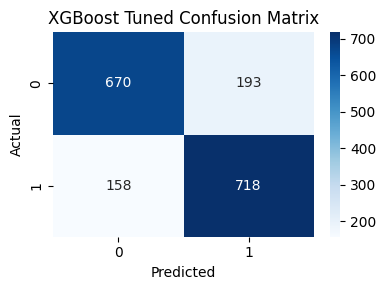


=== XGBoost Tuned Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       863
           1       0.79      0.82      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [24]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2.0]
}

# Initialize model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Random search
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:\n", random_search.best_params_)

# Evaluate on validation set
best_xgb = random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_val)

# Store metrics
metrics_dict['XGBoost Tuned'] = {
    'Accuracy': accuracy_score(y_val, y_pred_xgb),
    'Precision': precision_score(y_val, y_pred_xgb),
    'Recall': recall_score(y_val, y_pred_xgb),
    'F1': f1_score(y_val, y_pred_xgb)
}

# Plot confusion matrix and classification report
plot_confusion_matrix(y_val, y_pred_xgb, "XGBoost Tuned")
print_classification_report(y_val, y_pred_xgb, "XGBoost Tuned")

/tmp/ipython-input-2545953031.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_train_df, show=True)


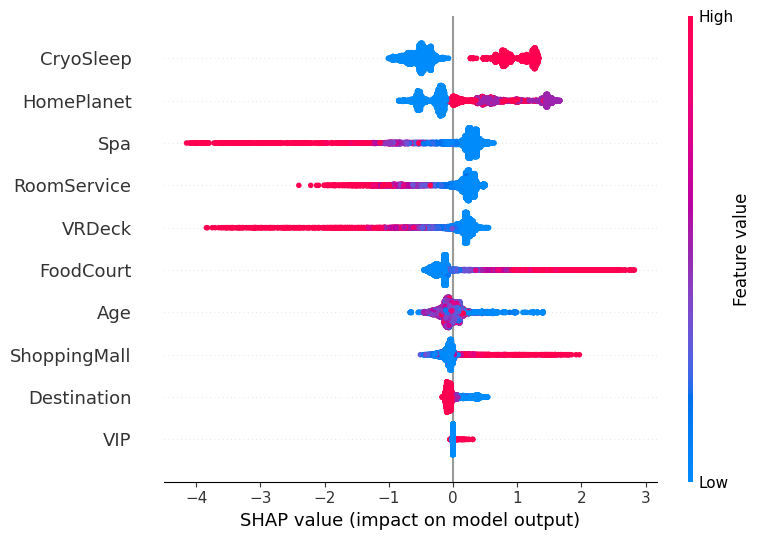

In [25]:
#shap for xgb
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Create SHAP explainer for XGBoost
explainer_xgb = shap.TreeExplainer(best_xgb)

# Get SHAP values
shap_values_xgb = explainer_xgb.shap_values(X_train_df)

# Plot SHAP summary
shap.summary_plot(shap_values_xgb, X_train_df, show=True)

In [27]:
test_pred_xgb = best_xgb.predict(X_test)
pd.DataFrame({'PassengerId': test_passenger_ids, 'Transported': test_pred_xgb.astype(bool)}).to_csv("submission_xgb.csv", index=False)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


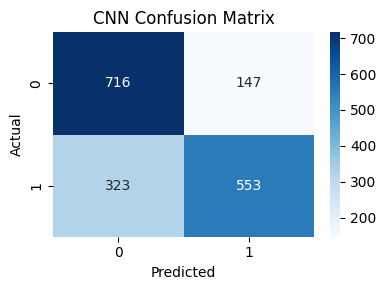


=== CNN Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       863
           1       0.79      0.63      0.70       876

    accuracy                           0.73      1739
   macro avg       0.74      0.73      0.73      1739
weighted avg       0.74      0.73      0.73      1739



In [29]:
# --- CNN ---
cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_val_cnn, y_val), verbose=0)

cnn_preds = (cnn.predict(X_val_cnn) > 0.5).astype(int).flatten()
test_pred_cnn = (cnn.predict(X_test_cnn) > 0.5).astype(bool).flatten()

metrics_dict['CNN'] = {
    'Accuracy': accuracy_score(y_val, cnn_preds),
    'Precision': precision_score(y_val, cnn_preds),
    'Recall': recall_score(y_val, cnn_preds),
    'F1': f1_score(y_val, cnn_preds)
}
plot_confusion_matrix(y_val, cnn_preds, "CNN")
print_classification_report(y_val, cnn_preds, "CNN")

In [30]:
pd.DataFrame({'PassengerId': test_passenger_ids, 'Transported': test_pred_cnn}).to_csv("submission_cnn.csv", index=False)

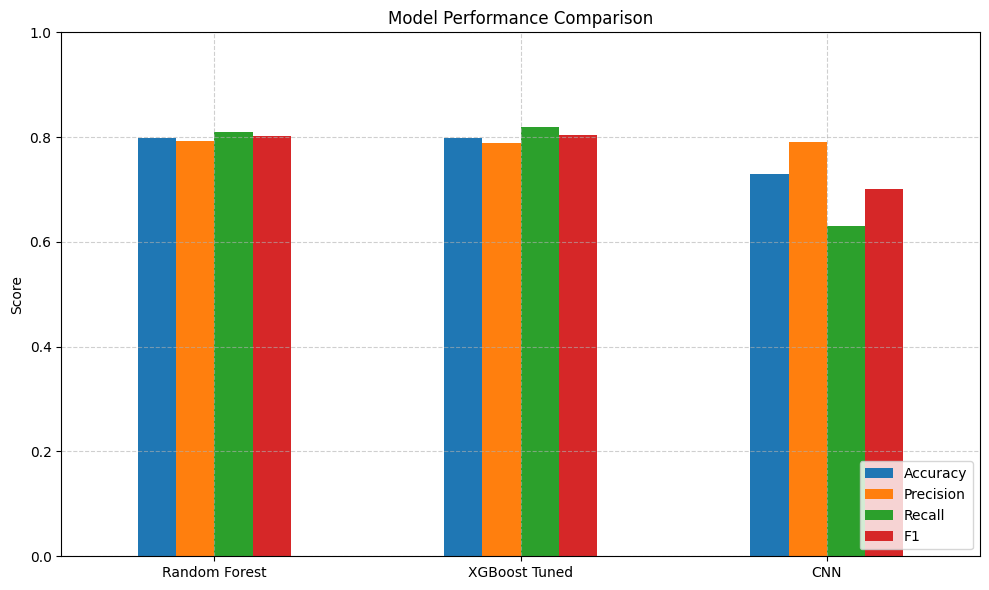

In [31]:
metrics_df = pd.DataFrame(metrics_dict).T
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()